Successfully loaded data from Reddit and X.

--- Keyword Frequencies by Platform ---
        keyword  reddit  twitter
0           100       1       20
1          city       0       21
11      program       0       22
4    generation       0       23
8       install       0       25
9           new       1       24
6          help       1       26
14        solar       1       26
10        power       1       27
2          cost       0       32
13           rt       0       42
3        energy      11       34
7         https       0       48
12  reliability       0       66
5          grid       2       73

Generating comparative bar chart...


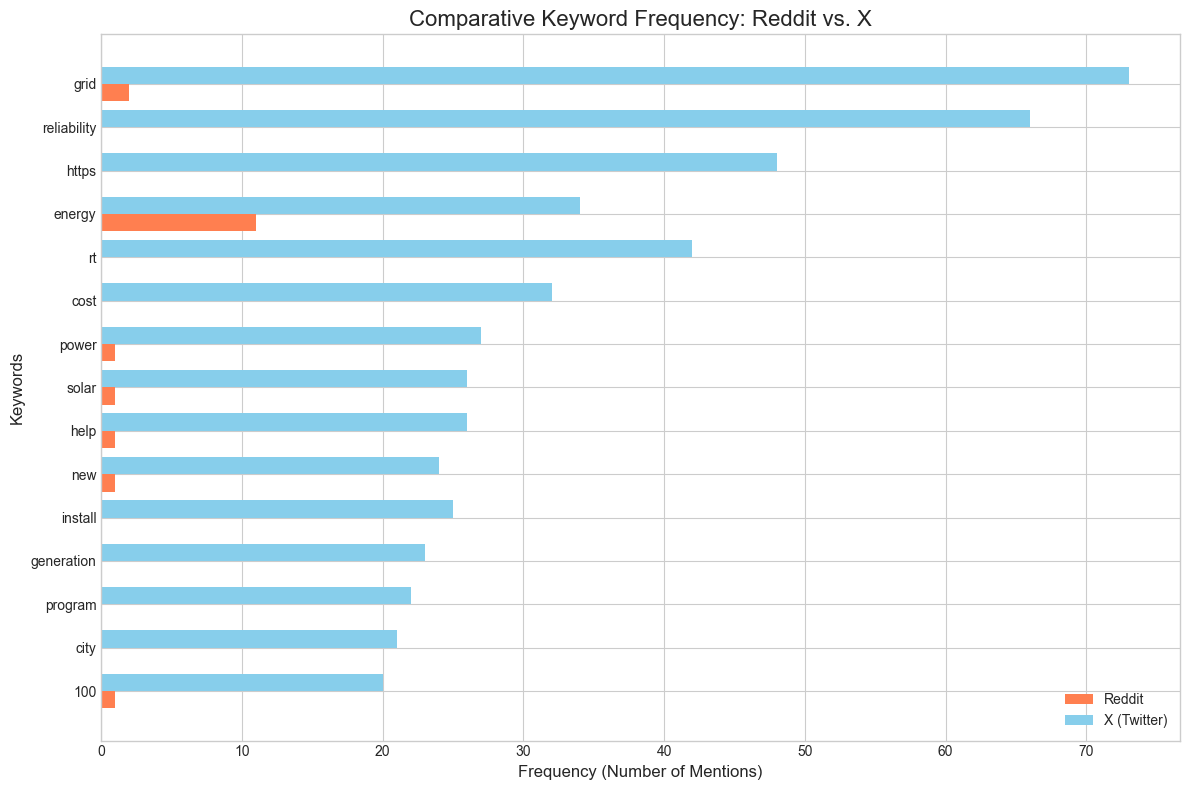


Comparative chart saved to /figures/comparative_keywords_chart.png


In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import os
import numpy as np

# --- 1. LOAD ALL DATA SOURCES ---
reddit_path = '../data/raw/reddit_titles.csv'
twitter_path = '../data/raw/twitter_data.csv'

df_reddit = pd.read_csv(reddit_path)
df_twitter = pd.read_csv(twitter_path)

print("Successfully loaded data from Reddit and X.")

# --- 2. FIND TOP KEYWORDS ACROSS BOTH PLATFORMS ---
all_titles = pd.concat([df_reddit['title'].dropna(), df_twitter['title'].dropna()], ignore_index=True)

# Use one vectorizer on all titles to get a consistent vocabulary of the top 15 words overall
vectorizer = CountVectorizer(stop_words='english', max_features=15)
vectorizer.fit(all_titles)
top_keywords = vectorizer.get_feature_names_out()

# --- 3. CALCULATE FREQUENCY FOR EACH PLATFORM SEPARATELY ---
# Use the fitted vectorizer to count frequencies in each dataset
reddit_counts = vectorizer.transform(df_reddit['title'].dropna()).toarray().sum(axis=0)
twitter_counts = vectorizer.transform(df_twitter['title'].dropna()).toarray().sum(axis=0)

# Create a final DataFrame for plotting
final_df = pd.DataFrame({
    'keyword': top_keywords,
    'reddit': reddit_counts,
    'twitter': twitter_counts
})

# Sort by the total frequency for a cleaner chart
final_df['total'] = final_df['reddit'] + final_df['twitter']
final_df = final_df.sort_values(by='total', ascending=True).drop(columns=['total'])

print("\n--- Keyword Frequencies by Platform ---")
print(final_df)

# --- 4. VISUALIZE THE COMPARISON ---
print("\nGenerating comparative bar chart...")

# Set up the positions for the bars on the y-axis
y_pos = np.arange(len(final_df))
height = 0.4  # Height of the bars

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the bars for Reddit and Twitter, offsetting their y-positions
rects1 = ax.barh(y_pos - height/2, final_df['reddit'], height, label='Reddit', color='coral')
rects2 = ax.barh(y_pos + height/2, final_df['twitter'], height, label='X (Twitter)', color='skyblue')

# Add title, labels, and ticks
ax.set_title('Comparative Keyword Frequency: Reddit vs. X', fontsize=16)
ax.set_xlabel('Frequency (Number of Mentions)', fontsize=12)
ax.set_ylabel('Keywords', fontsize=12)
ax.set_yticks(y_pos)
ax.set_yticklabels(final_df['keyword'])
ax.legend() # Add a legend to explain the colors

fig.tight_layout()

# Save the final chart
os.makedirs('../figures', exist_ok=True)
plt.savefig('../figures/comparative_keywords_chart.png')

plt.show()
print("\nComparative chart saved to /figures/comparative_keywords_chart.png")